In [19]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


In [21]:
x_train = x_train / 255.0
x_test = x_test / 255.0


Преобразование категориальных меток в one-hot encoding

In [22]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Добавление измерения для канала (т.к. у нас один канал изображения)

In [23]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

Создание модели

In [24]:
input_shape = (28, 28, 1)
model = keras.Sequential([
    Conv2D(32, padding='same', kernel_size=(3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2,2), strides=2),
    Conv2D(64, padding='same', kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2,2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Добавляем Dropout
    Dense(64, activation='relu'),  # Увеличиваем количество нейронов
    Dense(10, activation='softmax')
    ])

Компиляция модели

In [25]:
model.compile(optimizer=RMSprop(),  # Заменяем оптимизатор на RMSprop
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Аугментация данных

In [26]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

Обучение модели
Добавили раннюю остановку (Early Stopping)

In [28]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(datagen.flow(x_train, y_train_cat, batch_size=32),
                    steps_per_epoch=len(x_train) / 32,
                    epochs=15,
                    validation_data=(x_test, y_test_cat),
                    callbacks=[early_stopping])

Epoch 1/15
1875/1875 [==============================] - 47s 25ms/step - loss: 0.7758 - accuracy: 0.7074 - val_loss: 0.4994 - val_accuracy: 0.8170
Epoch 2/15
1875/1875 [==============================] - 50s 27ms/step - loss: 0.5476 - accuracy: 0.7967 - val_loss: 0.3913 - val_accuracy: 0.8618
Epoch 3/15
1875/1875 [==============================] - 51s 27ms/step - loss: 0.4994 - accuracy: 0.8170 - val_loss: 0.4088 - val_accuracy: 0.8529
Epoch 4/15
1875/1875 [==============================] - 49s 26ms/step - loss: 0.4838 - accuracy: 0.8249 - val_loss: 0.3924 - val_accuracy: 0.8632
Epoch 5/15
1875/1875 [==============================] - 49s 26ms/step - loss: 0.4826 - accuracy: 0.8273 - val_loss: 0.4162 - val_accuracy: 0.8605


Построение графиков точности и потерь

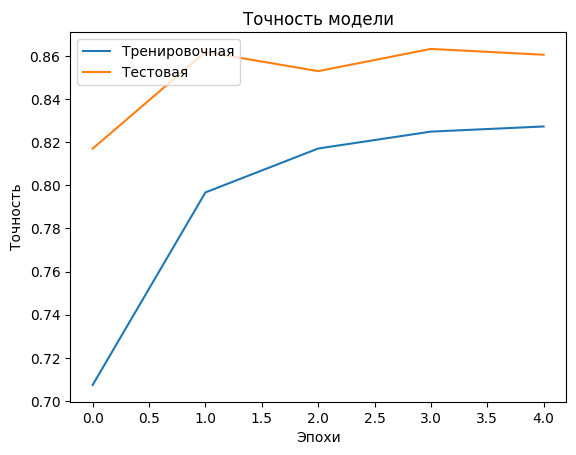

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('Точность')
plt.xlabel('Эпохи')
plt.legend(['Тренировочная', 'Тестовая'], loc='upper left')
plt.show()

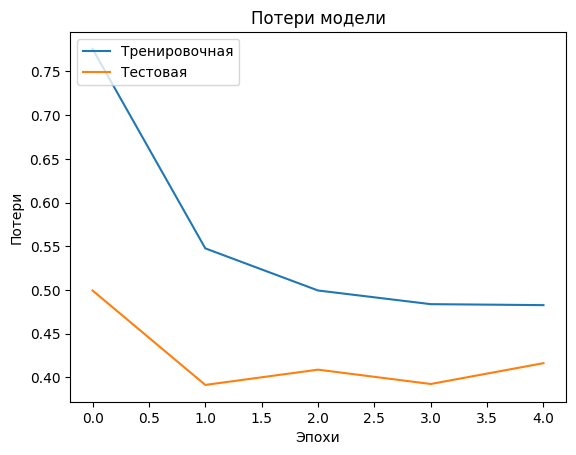

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('Эпохи')
plt.legend(['Тренировочная', 'Тестовая'], loc='upper left')
plt.show()

Вывод информации о модели

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

Что мы сделали:
1. Увеличили количество эпох до 15.
2. Добавили Dropout.
3. Добавили Early Stopping.
4. Заменили оптимизатор Adam на RMSprop.
5. Добавили аугментацию данных.


Вывод: 
На графиках функции потерь и точности модели можно было бы увидеть, что после 1 эпохи точность на тренировочном наборе продолжает расти, в то время как точность на валидационном наборе начинает снижаться или оставаться примерно на том же уровне
Несмотря на увеличение точности на тренировочном наборе данных, модель начала показывать признаки переобучения после 5 эпохи/